### Show all files

In [9]:
!ls *.csv

bernie.csv  clinton.csv cruz.csv    trump.csv


### import relevant libraries

In [256]:
import pandas as pd
import nltk
import matplotlib.pyplot as plt
plt.style.use('ggplot')

#enable plot to show inside notebook
%matplotlib inline

### create dataframe for each file

In [102]:
bernie_df = pd.read_csv('bernie.csv')
clinton_df = pd.read_csv('clinton.csv')
trump_df = pd.read_csv('trump.csv')
cruz_df = pd.read_csv('cruz.csv')

### show sample of the data

In [18]:
bernie_df.head(3)

,author_flair_text,subreddit_id,parent_id,body,subreddit,created_utc,link_id,author_flair_css_class,author,id,score
0,NaN,2cneq,d2ki87b,"No, I was just pointing out that they started ...",politics,1461838147,4gqxxk,NaN,tripleyump,d2kid04,NaN
1,NaN,31c2x,d2k9grs,B is a bad rating? I'm just getting downvotes ...,enoughsandersspam,1461838501,4gohx5,NaN,Hi_ImBillOReilly,d2kigi9,NaN
2,NaN,31c2x,4grw2j,I have a feeling that once the general electio...,enoughsandersspam,1461836612,4grw2j,NaN,Tabordactyl,d2khynl,NaN


### how many unique subreddits mention these politicians

In [103]:
print "bernie: ", len(bernie_df.subreddit.unique())
print "clinton: ", len(clinton_df.subreddit.unique())
print "trump: ", len(trump_df.subreddit.unique())
print "cruz: ", len(cruz_df.subreddit.unique())

bernie:  46
clinton:  49
trump:  103
cruz:  17


### chart showing unique subreddits

In [104]:
sub_df = pd.DataFrame.from_dict({
        "bernie": len(bernie_df.subreddit.unique()),
        "clinton": len(clinton_df.subreddit.unique()),  
        "trump": len(trump_df.subreddit.unique()),        
        "cruz": len(cruz_df.subreddit.unique()),        
}, orient='index')

# rename column
sub_df.columns = ['count']

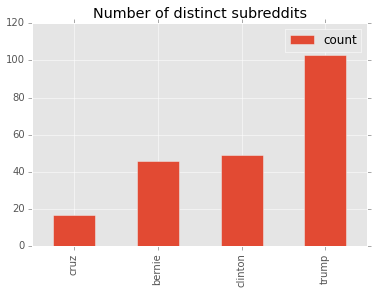

In [105]:
sub_df.sort_values(by=['count']).plot(kind='bar', title='Number of distinct subreddits')

#### The bar chart shows a clear gap between trump and the other candidates but it is hard to compare others without trumpso let's have the raw numbers

In [106]:
sub_df.sort_values(by=['count'])

,count
cruz,17
bernie,46
clinton,49
trump,103


#### One way to interpret this is that Trump's popularity is just like his media popularity. But remember that this data is only for one hour.

# Let's take a closer look at the texts for each candidate

In [130]:
bernie_txt = ' '.join(txt for txt in bernie_df.body).split()
clinton_txt = ' '.join(txt for txt in clinton_df.body).split()
trump_txt = ' '.join(txt for txt in trump_df.body).split()
cruz_txt = ' '.join(txt for txt in cruz_df.body).split()

In [133]:
print 'bernie:', len(bernie_txt)
print 'clinton:', len(clinton_txt)
print 'trump:', len(trump_txt)
print 'cruz:', len(cruz_txt)

bernie: 19857
clinton: 23172
trump: 31849
cruz: 1771


#### Looks like not many people are talking about Cruz... or our initial query didn't capture other terms that refer to Ted Cruz.

Remove stopwords from each candidate's text in other to see text contents

*NB: Stop Words are words which do not contain important significance to be used in Search Queries. Usually these words are filtered out from search queries because they return vast amount of unnecessary information.*

In [134]:
from nltk.corpus import stopwords

### example of stopwords

In [135]:
stopwords.words('English')[:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

### Unicodes can be problematic so they need to be converted properly

In [304]:
bernie_filtered_txt = [word for word in bernie_txt if word.decode('utf8', 'ignore') not in stopwords.words('english')]
clinton_filtered_txt = [word for word in clinton_txt if word.decode('utf8', 'ignore') not in stopwords.words('english')]
trump_filtered_txt = [word for word in trump_txt if word.decode('utf8', 'ignore') not in stopwords.words('english')]
cruz_filtered_txt = [word for word in cruz_txt if word.decode('utf8', 'ignore') not in stopwords.words('english')]

### Example of words after filtering

In [140]:
bernie_filtered_txt[:10]

['No,',
 'I',
 'pointing',
 'started',
 'left',
 'moving',
 'right.',
 'So',
 'even',
 'political']

### Show wordcloud of texts

In [182]:
from wordcloud import WordCloud

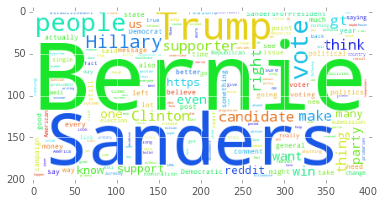

In [183]:
wc = WordCloud(background_color="white").generate(' '.join(bernie_filtered_txt))
plt.imshow(wc)

#### As expected, the two words "Bernie", "Sanders" will crowd the wordcloud as these were the keywords for the query.

### It'd be interesting to remove "bernie", "sanders" and then see what texts show clearly

In [196]:
reject_words = ["bernie", "sanders"]
bernie_filtered_txt = [word for word in bernie_txt if word.lower() not in reject_words]

wc = WordCloud(background_color="white").generate(' '.join(bernie_filtered_txt))
plt.imshow(wc)

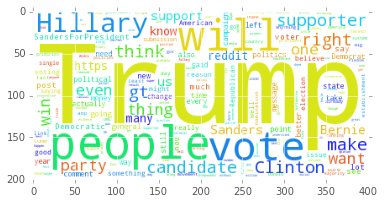

In [197]:
reject_words = ["bernie", "sanders"]
bernie_filtered_txt = [word for word in bernie_txt if word.lower() not in reject_words]

wc = WordCloud(background_color="white").generate(' '.join(bernie_filtered_txt))
plt.imshow(wc)

So clearly, "Trump" was mentioned a lot in the last hour whenever individuals discussed "Bernie". Maybe people
perceive what the debate would be like if Bernie won the party nomination and had to face Trump. 

What happens if we decide to remove all the other candidates' names?

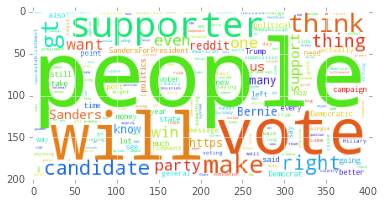

In [198]:
reject_words = ["bernie", "sanders", "hillary", "clinton", "donald", "trump", "ted", "cruz"]
bernie_filtered_txt = [word for word in bernie_txt if word.lower() not in reject_words]

wc = WordCloud(background_color="white").generate(' '.join(bernie_filtered_txt))
plt.imshow(wc)

Is he a 'people' person? What are people really saying about him?

### Let's check some of the full text in our original dataframe where the text 'people' appeared

In [214]:
txt_of_interest = bernie_df.body[bernie_df.body.str.contains('people')][:3]

In [215]:
for x in txt_of_interest:
    print x

Because they ended the deadline before the candidates were even on the ballots.
In New York the candidates on the ballot get put on months after the registration deadline ended.
The DNC has been trying everything to suppress votes from day one by not doing any debates until it's favorable for Hillary, to changing funding rules when Hillary was running out of money, to her campaign stalling caucuses for 5h+ and in some instances even calling the cops on people, to voting machine rigging in her favor several audits for that problem have been held(And to no ones surprise the owner of the company is close to Hillary...), to changing polling places last minute, to even reducing polling places and polling staff on purpose, or the hundreds of thousands all over the country that got their voting registrations changed or got wrong ballots from poll workers.

I've been following this campaign when it was still in single digits and the amount of shit the DNC has been pulling against Sanders is ju

Turns out the first few text mentioning'people' was referring to a completely different context:

 - ...even calling the cops on **people**...
 - ...beat it into **peoples** heads and shes cooked.
 - with the position **people** protest...


# Enough of Bernie, let's generate word clouds for the other candidates

## Trump

In [267]:
# we go to final step of remove all candidates names to see what's left
trump_filtered_txt = [word for word in trump_txt if word.lower() not in reject_words]

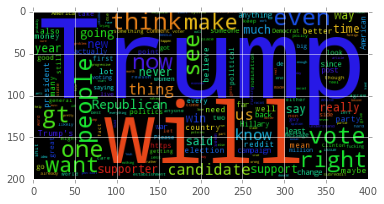

In [278]:
wc = WordCloud(background_color="black").generate(' '.join(trump_filtered_txt))
plt.imshow(wc)

We removed all candidates' names but 'Trump' still appears in the Word cloud. A closer reveals that words like 'Trump;', 
'www.website_url/Trump/news', etc will still appear so we regex has to be used if we decide to remove every 'Trump'


In [307]:
stopwords.words('English')[:10]

[u'i',
 u'me',
 u'my',
 u'myself',
 u'we',
 u'our',
 u'ours',
 u'ourselves',
 u'you',
 u'your']

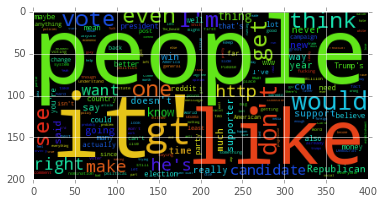

In [281]:
all_stopwords = ' '.join(reject_words + stopwords.words('English'))
wc = WordCloud(background_color="black", stopwords=all_stopwords).generate(' '.join(trump_filtered_txt))
plt.imshow(wc)

In [282]:
txt_of_interest = trump_df.body[trump_df.body.str.contains('people')][:3]
for x in txt_of_interest:
    print x

What do people do, worldwide, when Donald Trump speaks? That's right! They listen.  She doesn't know what touched is yet and no smears are needed.  

 
If you didn't feel threatened you wouldn't be dropping your crappy opinions and nauseating scribbles in a Trump thread. He's already got you doing the opposite of supporting your candidate. 
Suuuure they won't!

They might not be as enthusiastic about it.  And a select few might not, but the vast majority of them will fall in line unless they want the words "President Trump" to be spoken over the next 4 years on a regular basis.  

Even with all the bullshit propaganda on Reddit, most Dems not caught in the anti-Hillary echo-chamber will see that on most views they really aren't that different, and yet both Democrats are in stark contrast to anything on the GOP side on many key issues.  Are you kidding me with this religious-pandering, anti-science bullshit?!  Those fuckers can't even come out and admit Climate Change is a thing and the

## clinton

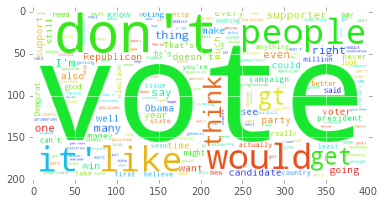

In [286]:
wc = WordCloud(background_color="white", stopwords=all_stopwords).generate(' '.join(clinton_txt))
plt.imshow(wc)

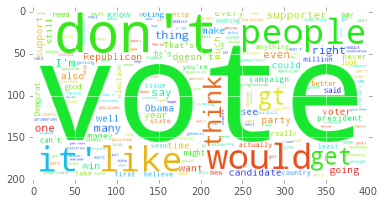

In [286]:
wc = WordCloud(background_color="white", stopwords=all_stopwords).generate(' '.join(clinton_txt))
plt.imshow(wc)

In [ ]:
Don't vote for Clinton? Let's take a closer look where people mentioned "don't"

In [288]:
txt_of_interest = clinton_df.body[clinton_df.body.str.contains("don't")][:3]
for x in txt_of_interest:
    print x

I feel you frustration sir/madam. I am growing increasing frustrated with the situation at hand. What's worse is that none of this information seems to make any difference to anyone voting for her. Her supporters *know* she's a liar, they *know* the system is rigged in her favor, and they talk about her winning rigged primaries and caucuses with fat fucking grins on their faces. Those who don't support her are meant to quietly back up until November when we're told we *must* support her. I don't buy into it at all. I refuse to vote for someone as patronizing and bold-facededly crooked as Hillary fucking Clinton. Furthermore, I refuse to buy into the idea that it's somehow my fault if something bad happens in the next four years because I didn't vote for her, because it's not my fault that the DNC rigged this election in her favor from the start. If my voice doesn't matter now, you can't change you mind and tell me it matters later. 

I feel very disillusioned by this whole election cyc

### Well looks like one of them is about not voting for Clinton:

Turns out one of them is about not voting for Clinton: 
- "I **don't** buy into it at all. I refuse to vote for someone as patronizing and bold-facededly crooked as Hillary fucking Clinton"

## Cruz

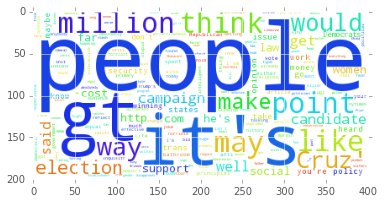

In [290]:
wc = WordCloud(background_color="white", stopwords=all_stopwords).generate(' '.join(cruz_txt))
plt.imshow(wc)

In [291]:
txt_of_interest = cruz_df.body[cruz_df.body.str.contains("people")][:3]
for x in txt_of_interest:
    print x

I would like to take this moment to point out that Donald Trump is not evil. Is he an asshole who likes to piss people off for fun/profit? Yes. But, not looking down the barrel of a felony indictment. Not the kind of snake in the grass that Ted Cruz is. Donald Trump might be the kind of dude who occasionally makes jokes that are not PC, but Ted Cruz is the type of dude who is attending klan rallies.
&gt; You misunderstand the Charlotte ordinance. There are 17 States with the same law written the same way. Your fantasy is not actually happening in those states. 

I never said it's happening. In said it sets a legal ability for perverts to get away with being in the opposite sex bathroom/locker room. Is rather allow a business be able to solve a dispute logically without it being a crime for them to do so.

The bathroom requirement is stupid.

&gt; This fight is being lead by anti-gay groups. 

Because fear sells. Because politicians will play to their audience. The average audience, is 

### Highlight from Cruz with the most common word: 'people'

- And Ted Cruz is a fear mongering little bitch. What's your point?
Old white **people** vote, that is all. If 18-30 year olds would get off their ass and vote we would jump to the left so quick Ted Cruz's head would spin, although I've heard it does that already. 

# Performing Sentiment Analysis for all candidates

In [313]:
from textblob import TextBlob

In [338]:
bernie_testimonial = TextBlob(' '.join(bernie_filtered_txt))
clinton_testimonial = TextBlob(' '.join(clinton_filtered_txt))
trump_testimonial = TextBlob(' '.join(trump_filtered_txt))
cruz_testimonial = TextBlob(' '.join(cruz_filtered_txt))

In [342]:
sentiment_df = pd.DataFrame.from_dict({
        "bernie": bernie_testimonial.sentiment.polarity,
        "clinton": clinton_testimonial.sentiment.polarity,
        "trump": trump_testimonial.sentiment.polarity,       
        "cruz": cruz_testimonial.sentiment.polarity
}, orient='index')

# rename column
sentiment_df.columns = ['polarity']

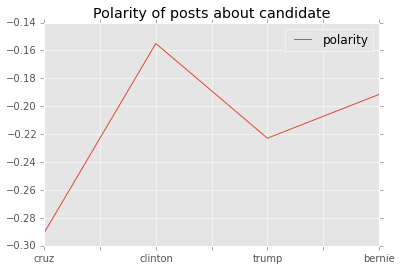

In [352]:
sentiment_df.plot(title='Polarity of posts about candidate')

The polarity score is a float within the range [-1.0, 1.0]. The lower, the value, the more negative the comments are. As seen, hillary has the highest negative polarity.